# **Salat Postures Project**

**Project Summary:**

Our project focuses on developing an object detection system tailored specifically for recognizing various salat postures, including **Ruku** (bowing), **Raising**, and **Takbeer** (standing). These postures are fundamental components of the Islamic prayer ritual, and accurately detecting them holds significance for aiding individuals in performing prayers correctly and effectively.

 - Leveraging deep learning algorithms and computer vision methodologies, we train our model on annotated datasets comprising images or videos capturing individuals performing the salat.

The system's architecture incorporates advanced neural network models such as Faster R-CNN, and YOLO (You Only Look Once) V8,


In [ ]:
# Importing the drive module from Google Colab to mount Google Drive (Authorization).
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import necessary libraries**

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.2 MB/s eta 0:00:00


In [ ]:
# Import YOLO object detection model from Ultralytics and OpenCV for image processing.

from ultralytics import YOLO # YOLO object detection model
import cv2 # OpenCV for image processing
from google.colab.patches import cv2_imshow # Patched version of cv2_imshow for displaying images in Google Colab

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 46.3MB/s]


# **Visualizing Sample of The Training Dataset**



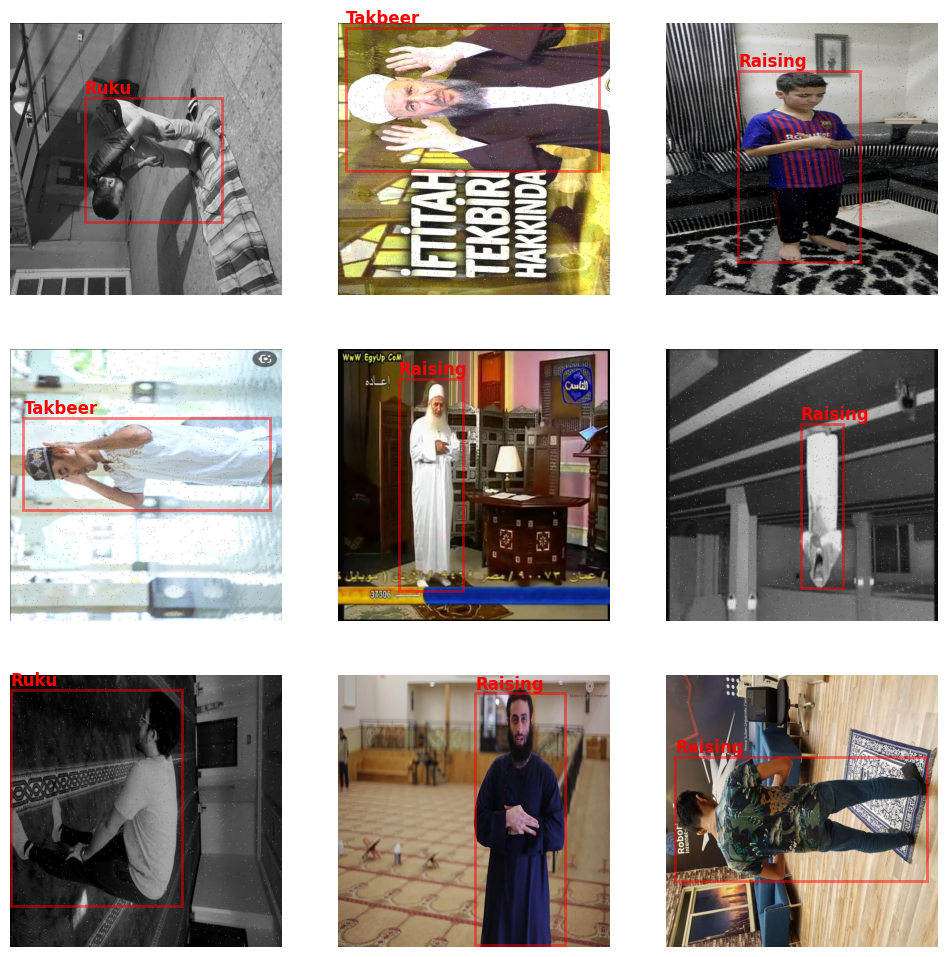

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random
from matplotlib.patches import Rectangle

# Define the class labels
class_labels = {
    0: "Raising",
    1: "Ruku",
    2: "Takbeer"
}

# Path to the directory containing training images and annotations
data_dir = "/content/drive/MyDrive/SalatPostures Dataset/train"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(os.path.join(data_dir, "images")) if f.endswith(".jpg")]

# Randomly select 9 images
sample_images = random.sample(image_files, 9)

# Plotting the sample images
plt.figure(figsize=(12, 12))
for i, image_file in enumerate(sample_images):
    # Load the image
    image_path = os.path.join(data_dir, "images", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load corresponding annotation file
    annotation_file = os.path.splitext(image_file)[0] + ".txt"
    annotation_path = os.path.join(data_dir, "labels", annotation_file)
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # Plot the image with bounding boxes
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert normalized coordinates to absolute coordinates
        width *= image.shape[1]
        height *= image.shape[0]
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        # Calculate bounding box coordinates
        x1 = x_center - width/2
        y1 = y_center - height/2
        # Create a rectangle patch with adjusted transparency
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none', alpha=0.5)
        # Add the patch to the current axis
        plt.gca().add_patch(rect)
        # Get the label corresponding to the class ID
        label = class_labels[int(class_id)]
        # Add label with increased font size
        plt.text(x1, y1 - 10, label, fontsize=12, color='r', weight='bold')
    plt.axis('off')

plt.show()


# **Training YOLO V8 Model**


Train the YOLOv5 model with the specified data and hyperparameters:
- **Data**: "/content/drive/MyDrive/Colab Notebooks/SalatPostures/Salat Postures.v1i.yolov8/data.yaml"
- **Number of epochs**: 65 (Number of times the entire dataset will be passed forward and backward through the neural network during training)
- **Initial learning rate** (lr0): 0.1 (Starting learning rate for the optimizer)
- **Final learning rate** (lrf): 0.0001 (Final learning rate for the optimizer after cosine learning rate scheduling)
- **Cosine learning rate scheduling** (cos_lr): True (Flag indicating whether to use cosine learning rate scheduling, which gradually decreases the learning rate over epochs to prevent overshooting)

---



During the training process, the following actions were taken:

- **Scanning Train Data**: The training data directory was scanned for image labels. In this case, 246 images were found for training, with no background images or corrupt data.

- **Data Augmentation**: Various augmentation techniques were applied to the training data, including blur, median blur, grayscale conversion, and CLAHE (Contrast Limited Adaptive Histogram Equalization). These augmentations help in increasing the diversity of the training data and improving the model's robustness.

- **Scanning Validation Data**: Similar to the training data, the validation data directory was scanned for image labels. In this case, 23 images were found, with no background images or corrupt data.

- **Optimizer Selection**:  AdamW optimizer with a learning rate of 0.001667 and momentum of 0.9 was selected.

Overall, these steps are part of the setup and initialization process before training the YOLOv5 model, ensuring that the data is properly prepared and the optimizer is appropriately configured.

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Use the model
model.train(data="/content/drive/MyDrive/SalatPostures Dataset/data.yaml", epochs=40, lr0 = 0.1, lrf = 0.001, cos_lr = True, plots = True, dropout = 0.0, optimizer = 'auto', batch = 64) # train the model

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/SalatPostures Dataset/data.yaml, epochs=40, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/SalatPostures Dataset/train/labels.cache... 1372 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1372/1372 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/SalatPostures Dataset/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      8.04G      1.445      3.351      1.651        195        640:   9%|▉         | 2/22 [00:29<04:58, 14.91s/it]


KeyboardInterrupt: 

In [ ]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/runs/detect/train8/weights/best.pt')

# **Validation YOLO V8 Model**

In [ ]:
model.val(data="/content/drive/MyDrive/SalatPostures Dataset/data.yaml")

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 33.4MB/s]
val: Scanning /content/drive/MyDrive/SalatPostures Dataset/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:22<00:00,  6.38s/it]


                   all        205        235      0.914      0.933      0.959      0.776
               raising        205         64      0.884      0.938      0.971      0.753
                  ruku        205         87      0.872       0.92      0.923      0.712
               takbeer        205         84      0.984       0.94      0.982      0.863
Speed: 11.5ms preprocess, 347.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792f28176fe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# **External Source for Images To Test Model With**

In [ ]:
# Define Urls for number of images on internet to test model with
ruku_image_urls = [   "/content/drive/MyDrive/Takbeer Images/takbeer-1.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-1.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-2.jpg",
                    "/content/drive/MyDrive/Ruku Images/ruku-3.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-4.jpg",
                     "/content/drive/MyDrive/Ruku Images/ruku-5.jpg",
                   "/content/drive/MyDrive/Ruku Images/ruku-6.jpg", ]

In [ ]:
# Define Urls for number of images on internet to test model with
takbeer_image_urls = [ "/content/drive/MyDrive/Ruku Images/ruku-1.jpg",
                      "/content/drive/MyDrive/Takbeer Images/takbeer-1.jpg",
                   "/content/drive/MyDrive/Takbeer Images/takbeer-2.jpg",
                    "/content/drive/MyDrive/Takbeer Images/takbeer-3.jpg", ]


image 1/1 /content/drive/MyDrive/Ruku Images/ruku-2.jpg: 640x448 1 ruku, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.8811], device='cuda:0')
data: tensor([[2.4483e+01, 4.7539e+02, 7.8490e+02, 1.2800e+03, 8.8112e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1280, 891)
shape: torch.Size([1, 6])
xywh: tensor([[404.6926, 877.6949, 760.4186, 804.6102]], device='cuda:0')
xywhn: tensor([[0.4542, 0.6857, 0.8534, 0.6286]], device='cuda:0')
xyxy: tensor([[  24.4833,  475.3898,  784.9019, 1280.0000]], device='cuda:0')
xyxyn: tensor([[0.0275, 0.3714, 0.8809, 1.0000]], device='cuda:0')
Bounding box coordinates (x1, y1, x2, y2): 24.4832763671875 475.3897705078125 784.90185546875 1280.0
Ruku pose detected with an error of 18.35%.


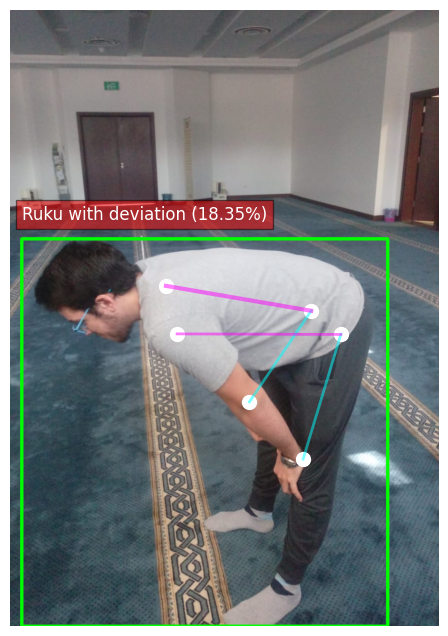

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad1 = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad1 = angle_rad1 % (2 * math.pi)
    angle_rad2 = math.atan2(a[1]-b[1], a[0]-b[0]) - math.atan2(c[1]-b[1], c[0]-b[0])
    angle_rad2 = angle_rad2 % (2 * math.pi)
    return math.degrees(min(angle_rad1, angle_rad2))

# Function to check if the pose resembles the ruku position in Salat
def is_ruku_pose(landmarks):
    # Get relevant landmarks (e.g., shoulders, hips)
    left_hip = (landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y)
    right_hip = (landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y)
    left_shoulder = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)
    right_shoulder = (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
    left_knee = (landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y)
    right_knee = (landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y)

    # Calculate angles between lines formed by hip to shoulder and hip to knee
    angle_left = abs(90 - calculate_angle(left_knee, left_hip, left_shoulder))
    angle_right = abs(90 - calculate_angle(right_knee, right_hip, right_shoulder))
    # Define condition for ruku pose (e.g., angles within a range around 90 degrees)
    ruku_angle_threshold = 30  # Adjust as needed
    if angle_left <= ruku_angle_threshold or angle_right <= ruku_angle_threshold:
        return True, min(abs(angle_left), abs(angle_right)) / 100 * 100  # Calculate error percentage
    else:
        return False, 0

# Function to process image and detect ruku pose
def process_image(image_path):
    # Load Model
    results = model.predict(image_path)

    for r in results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    x1, y1, x2, y2 = bounding_box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    Perfect_Threshold = 5;
    if results.pose_landmarks:
        # Check if pose resembles ruku pose
        is_ruku, error_percentage = is_ruku_pose(results.pose_landmarks.landmark)
        if is_ruku and error_percentage > Perfect_Threshold:
            print("Ruku pose detected with an error of {:.2f}%.".format(error_percentage-Perfect_Threshold))
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            if error_percentage <= 15:
                bg_color = 'green'
            else:
                bg_color = 'red'
            plt.text(x1, y1 - 40, "Ruku with deviation ({:.2f}%)".format(error_percentage-Perfect_Threshold), color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku and error_percentage <= Perfect_Threshold:
            print("Perfect Ruku pose detected")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines between hip and knee with one color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='cyan', linestyle='-', linewidth=2, alpha=0.5)

            # Draw lines between hip and shoulder with another color and 50% opacity
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=2, alpha=0.5)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=3, alpha=0.5)

            # Add text indicating ruku with error in the top of the image
            bg_color = 'green'
            plt.text(x1, y1 - 40, "Ruku with no deviation", color='white', fontsize=12, bbox=dict(facecolor=bg_color, alpha=0.5))
            plt.axis('off')
            plt.show()
        if is_ruku is False:
            print("Ruku pose not detected.")
            # Draw landmarks and connections for visualization
            plt.figure(figsize=(8, 8))
            plt.imshow(image_rgb)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Draw points for knees, hips, and shoulders
            for landmark in [mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.RIGHT_KNEE,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

            # Draw lines connecting hip to shoulder and hip to knee
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)
            plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * image.shape[1]],
                     [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0],
                      results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * image.shape[0]],
                     color='yellow', linestyle='-', linewidth=2)

            # Add text indicating not ruku in the top of the image
            plt.text(x1, y1 - 40, "Not Ruku Pose", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            plt.axis('off')
            plt.show()
    else:
        print("No pose detected in the image.")


# Example usage:
process_image(ruku_image_urls[2])

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to calculate angle between lines formed by three points
def calculate_angle(a, b, c):
    angle_rad = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle_rad = angle_rad % (2 * math.pi)
    return math.degrees(angle_rad)

# Function to check if the pose resembles the Takbeer position in Salat
def is_takbeer_pose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_index = landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value]
    right_index = landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value]

    # Check if left and right shoulders are on the same line
    if abs(left_shoulder.y - right_shoulder.y) < 0.05:
        # Check if distance between right hip and right shoulder in y-direction is big enough
        if right_hip.y - right_shoulder.y > 0.3:
            # Check if wrists are above the shoulders
            if left_wrist.y < left_shoulder.y and right_wrist.y < right_shoulder.y:
                # Check if index fingers are above the shoulders
                if left_index.y < left_shoulder.y and right_index.y < right_shoulder.y:
                    return True, abs(abs(left_shoulder.y)-abs(right_shoulder.y)) / 0.2 * 100
    return False, 0

# Function to process image and detect Takbeer pose
def process_image(image_path):

    model_results = model.predict(image_path)

    for r in model_results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:

        # Draw bounding box
        x1, y1, x2, y2 = bounding_box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)
        # Check if pose resembles Takbeer pose

        is_takbeer, error = is_takbeer_pose(results.pose_landmarks.landmark)
        if is_takbeer:
            text = "Takbeer with deviation ({:.2f}%)".format(error)
            text_color = 'white'
            bg_color = 'green'
        else:
            text = "Takbeer pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text(image.shape[1] / 2, 10, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))

        # Draw connections between all specified landmarks
        landmarks = results.pose_landmarks.landmark
        connections = [(mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
                       (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_WRIST),
                       (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_WRIST),
                       (mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
                       (mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX)]

        # Draw points for knees, hips, and shoulders
        for landmark in [mp_pose.PoseLandmark.LEFT_INDEX, mp_pose.PoseLandmark.RIGHT_INDEX,
                         mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.RIGHT_WRIST,
                             mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP,
                             mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.RIGHT_SHOULDER]:
                plt.scatter(results.pose_landmarks.landmark[landmark.value].x * image.shape[1],
                            results.pose_landmarks.landmark[landmark.value].y * image.shape[0],
                            color='white', s=100)

        for connection in connections:
            start_point = connection[0]
            end_point = connection[1]
            plt.plot([landmarks[start_point.value].x * image.shape[1], landmarks[end_point.value].x * image.shape[1]],
                     [landmarks[start_point.value].y * image.shape[0], landmarks[end_point.value].y * image.shape[0]],
                     color='magenta', linestyle='-', linewidth=1)
        # Draw landmarks and connections
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
process_image(takbeer_image_urls[0])



image 1/1 /content/drive/MyDrive/Raising Images/raising-1.jpg: 448x640 1 raising, 493.3ms
Speed: 14.2ms preprocess, 493.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9377])
data: tensor([[1.5146e+03, 4.3695e+02, 3.4151e+03, 3.2588e+03, 9.3769e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (3264, 4928)
shape: torch.Size([1, 6])
xywh: tensor([[2464.8425, 1847.8857, 1900.4340, 2821.8691]])
xywhn: tensor([[0.5002, 0.5661, 0.3856, 0.8645]])
xyxy: tensor([[1514.6256,  436.9513, 3415.0596, 3258.8203]])
xyxyn: tensor([[0.3074, 0.1339, 0.6930, 0.9984]])
Bounding box coordinates (x1, y1, x2, y2): 1514.6256103515625 436.9512634277344 3415.0595703125 3258.8203125


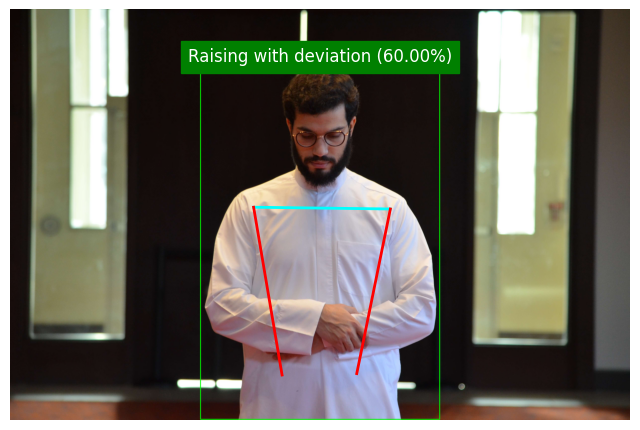

In [ ]:
import mediapipe as mp
import cv2
import math
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def is_raising_pose(landmarks):
    # Extract relevant landmarks
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    nose = landmarks[mp_pose.PoseLandmark.NOSE.value]
    chin = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

    # Initialize error percentage
    error_percentage = 0

    # Rule 1: Stand straight
    if abs(left_shoulder.y - right_shoulder.y) < 0.1:
        error_percentage += 20  # Each rule contributes 20% to the error

    # Rule 3: Position of hands
    if abs(left_elbow.x - left_shoulder.x) < 0.05 and abs(right_elbow.x - right_shoulder.x) < 0.05:
        error_percentage += 20

    # Rule 4: Avoid unnatural bends
    if abs(left_shoulder.x - left_hip.x) < 0.1 and abs(right_shoulder.x - right_hip.x) < 0.1:
        error_percentage += 20

    # Rule 5: Proper prostration
    if abs(nose.x - chin.x) < 0.05:
        error_percentage += 20

    # Rule 6: Maintain straightness in standing
    if abs(nose.x - left_shoulder.x) < 0.1 and abs(nose.x - right_shoulder.x) < 0.1:
        error_percentage += 20

    # If error percentage is less than 100, pose resembles the desired posture
    if error_percentage < 100:
        return True, error_percentage
    else:
        return False, error_percentage  # Pose does not resemble the desired posture



# Function to process image and detect raising pose
def process_image(image_path):

    # Load Model
    results = model.predict(image_path)

    for r in results:
        print(r.boxes)
        # Extract bounding box coordinates
        bounding_box = x1, y1, x2, y2 = r.boxes.xyxy[0].tolist()
        print("Bounding box coordinates (x1, y1, x2, y2):", x1, y1, x2, y2)
        bounding_box_tuple = tuple(bounding_box)

    bounding_box = tuple(int(value) for value in bounding_box_tuple)

    # Load image
    image = cv2.imread(image_path)

    # Draw bounding box
    x1, y1, x2, y2 = bounding_box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6)

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks:
        # Check if pose resembles raising pose
        is_raising, error = is_raising_pose(results.pose_landmarks.landmark)
        if is_raising:
            text = "Raising with deviation ({:.2f}%)".format(error)
            text_color = 'white'
            bg_color = 'green'
        else:
            text = "Raising pose not detected"
            text_color = 'white'
            bg_color = 'red'

        # Draw text above bounding box with background color
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.text((x1 + x2) / 2, y1 - 20, text, color=text_color, fontsize=12, ha='center',
                 bbox=dict(facecolor=bg_color, edgecolor=bg_color, pad=5))
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Draw lines connecting all detected landmarks
        for landmark in mp_pose.PoseLandmark:
            if landmark in mp_pose.POSE_CONNECTIONS:
                # Get landmark index
                landmark_index = landmark.value
                # Get landmark coordinates
                landmark_point = results.pose_landmarks.landmark[landmark_index]
                # Draw lines between adjacent landmarks
                for connected_landmark_index in mp_pose.POSE_CONNECTIONS[landmark]:
                    connected_landmark_point = results.pose_landmarks.landmark[connected_landmark_index]
                    # Draw line
                    plt.plot([landmark_point.x * image.shape[1], connected_landmark_point.x * image.shape[1]],
                            [landmark_point.y * image.shape[0], connected_landmark_point.y * image.shape[0]],
                            color='yellow', linestyle='-', linewidth=2)

        # Draw lines connecting hip and shoulder in one color, and elbow and shoulder in another color
        plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1]],
                 [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0]],
                 color='cyan', linestyle='-', linewidth=2)

        # Draw line between right shoulder and right hip in red color
        plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * image.shape[1],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].x * image.shape[1]],
                 [results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * image.shape[0],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP.value].y * image.shape[0]],
                 color='red', linestyle='-', linewidth=2)

        plt.plot([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * image.shape[1],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].x * image.shape[1]],
                 [results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * image.shape[0],
                  results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP.value].y * image.shape[0]],
                 color='red', linestyle='-', linewidth=2)

        plt.axis('off')
        plt.show()
    else:
        print("No pose detected in the image.")

# Example usage:
image_path = "/content/drive/MyDrive/Raising Images/raising-1.jpg"
process_image(image_path)
